# Blob Detection

In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

import sys
%pwd


'/Users/amy/code/homeplate/homeplate/python'

Current working directory: /Users/amy/code/homeplate/homeplate/python
['.DS_Store', 'test6.jpg', 'test7.png', 'test5.png', 'test4.png', 'test0.jpg', 'test1.jpg', 'test3.png', 'test2.png']


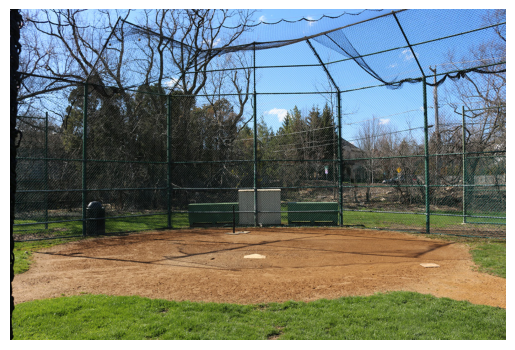

In [8]:
import os

# Print current working directory
print("Current working directory:", os.getcwd())
print(os.listdir('../images'))

im = cv2.imread('../images/test1.jpg')
# OpenCV loads images in BGR, convert to RGB for matplotlib
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [9]:
def load_rgb_from_imagepath(imagepath):
    im = cv2.imread(imagepath)
    # OpenCV loads images in BGR, convert to RGB for matplotlib
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    print('size', im_rgb.shape)
    return im_rgb

In [17]:
def imread_and_resize(imagepath):
    im = cv2.imread(imagepath)
    r = 2600 / im.shape[1]
    dim = (2600, int(im.shape[0] * r))
    return cv2.resize(im, dim)



In [10]:
""" Helper function that uses plt to show the cv image """
def show_image(im):
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

    plt.imshow(im_rgb)
    plt.axis('off')  # Hide axes
    plt.show()



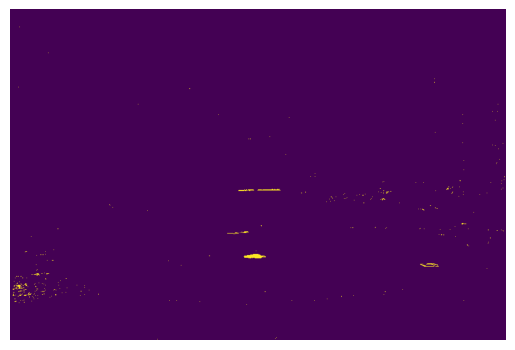

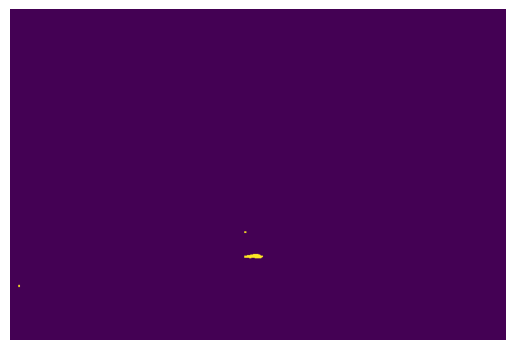

In [36]:
def filter_by_hsv(im, show=True):
    hsv_im = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

    # Ranges
        # Hue: 0 - 179
        # Saturation: 0 - 255
        # Value: 0 - 255
    hsv_lower_bound = (0, 25, 180)
    hsv_upper_bound = (30, 80, 255)

    # Manually try some values
    
    # hsv_lower_bound = (0, 0.1*255, .5*255)
    # hsv_upper_bound = (100, .4*255, 255)

    binary_mask = cv2.inRange(hsv_im, hsv_lower_bound, hsv_upper_bound)
    if show: 
        plt.imshow(binary_mask)
        plt.axis('off')
        plt.show()
    return binary_mask

def morph_open(im, show=True):
    kernel_size = 3
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    morph_open_im = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel)
    if show: 
        plt.imshow(morph_open_im)
        plt.axis('off')
        plt.show()

def create_mask(im):
    im = filter_by_hsv(im, show=False)
    return morph_open(im, show=False)

binary_mask = filter_by_hsv(im)
morph_open(binary_mask)

size (1463, 2600, 3)


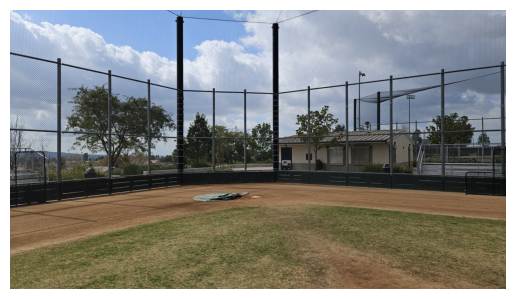

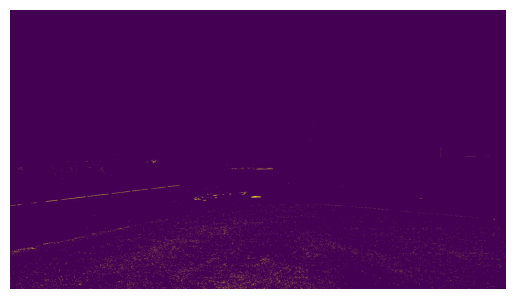

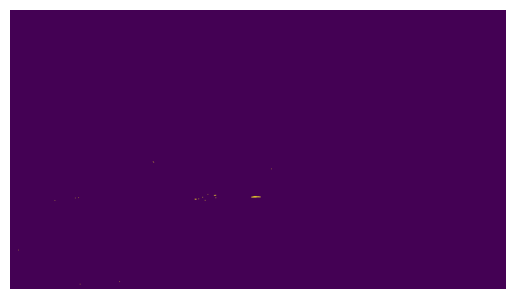

In [37]:
image2 = imread_and_resize('../images/test0.jpg')
print('size', image2.shape)

show_image(image2)
binary_mask = filter_by_hsv(image2)
morph_open(binary_mask)

(1944, 2600, 3)


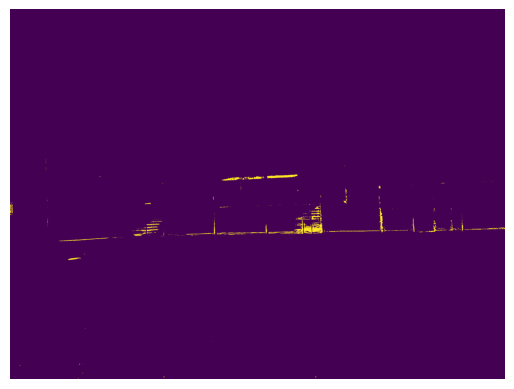

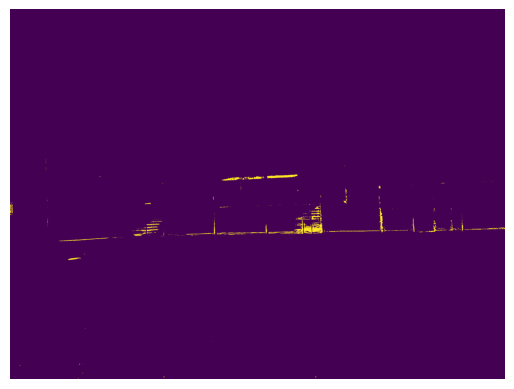

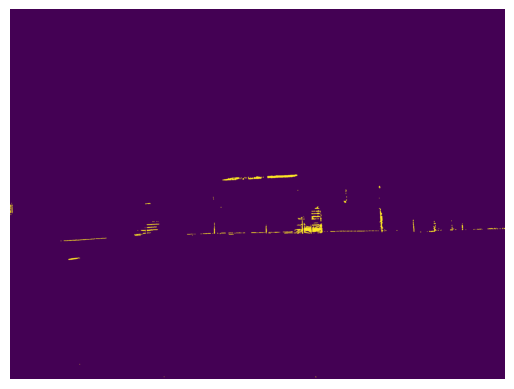

In [38]:
image3 = imread_and_resize('../images/test3.png')
print(image3.shape)
filter_by_hsv(image3)
binary_mask = filter_by_hsv(image3)
morph_open(binary_mask)

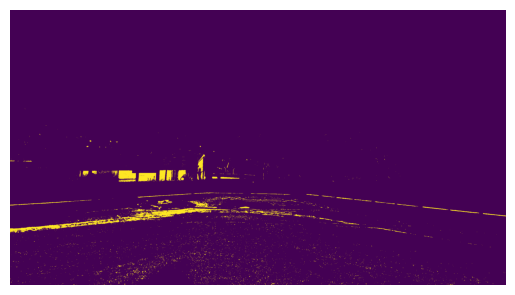

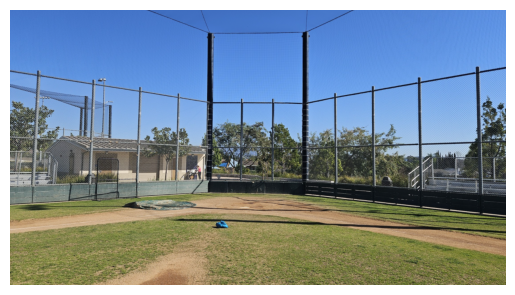

In [39]:
image4 = imread_and_resize('../images/test4.png')
filter_by_hsv(image4)
show_image(image4)

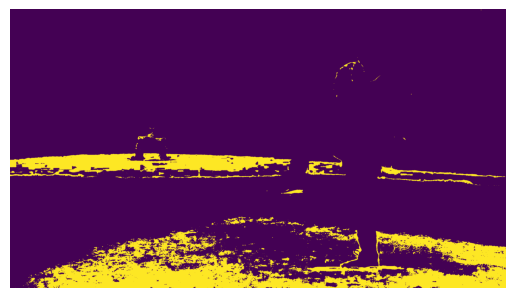

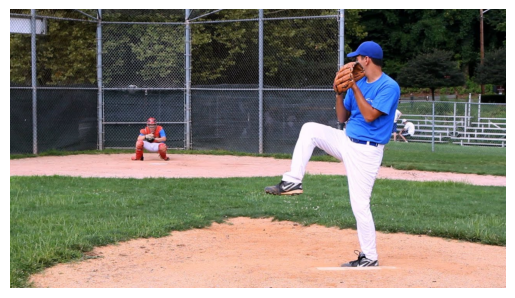

In [40]:
image6 = imread_and_resize('../images/test6.jpg')
filter_by_hsv(image6)
show_image(image6)

In [57]:
params = cv2.SimpleBlobDetector_Params()

# Filter by area 
# params.filterByArea = True
# params.maxArea = 1200
# params.minArea = 10 

params.minThreshold = 254
params.maxThreshold = 255

params.filterByCircularity = True
params.minCircularity = 0.01
params.maxCircularity = 0.4

params.filterByConvexity = True
params.minConvexity = 0.85
params.maxConvexity = 1

params.filterByInertia = False

params.minRepeatability = 1

()


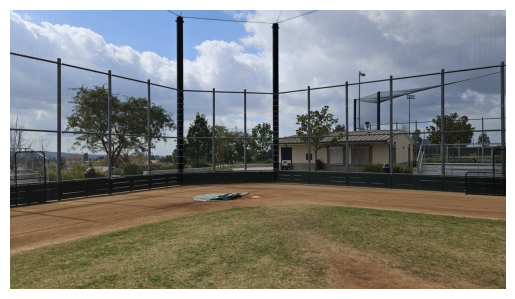

In [63]:
im = cv2.imread('../images/test0.jpg')
mask_im = create_mask(im)

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(im)

print(keypoints)
result = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), 
                           cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show the result
show_image(result)

Using trackbars for parameter tuning

In [11]:
import cv2
import numpy as np

# Load an image
image = cv2.imread("../images/test1.jpg", cv2.IMREAD_GRAYSCALE)

# Create a window
cv2.namedWindow("Blob Detection")

# Callback function for trackbars (not used, but needed)
def nothing(x):
    pass

# Create trackbars for adjusting parameters
cv2.createTrackbar("Min Area", "Blob Detection", 100, 5000, nothing)
cv2.createTrackbar("Min Circularity", "Blob Detection", 1, 100, nothing)
cv2.createTrackbar("Min Convexity", "Blob Detection", 1, 100, nothing)
cv2.createTrackbar("Min Inertia", "Blob Detection", 1, 100, nothing)

while True:
    # Get trackbar positions
    min_area = cv2.getTrackbarPos("Min Area", "Blob Detection")
    min_circularity = cv2.getTrackbarPos("Min Circularity", "Blob Detection") / 100.0
    min_convexity = cv2.getTrackbarPos("Min Convexity", "Blob Detection") / 100.0
    min_inertia = cv2.getTrackbarPos("Min Inertia", "Blob Detection") / 100.0

    # Set up parameters
    params = cv2.SimpleBlobDetector_Params()
    
    params.filterByArea = True
    params.minArea = min_area

    params.filterByCircularity = True
    params.minCircularity = min_circularity

    params.filterByConvexity = True
    params.minConvexity = min_convexity

    params.filterByInertia = True
    params.minInertiaRatio = min_inertia

    # Create detector with updated parameters
    detector = cv2.SimpleBlobDetector_create(params)
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR) # Convert to BGR for color drawing
    result = cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

#    # Display the result
#     cv2.imshow("Blobs Outlined", image_with_contours)

#     # Detect blobs
#     keypoints = detector.detect(image)
    
    # Draw detected blobs
    # result = cv2.drawKeypoints(image, image_with_contours, np.array([]), (0,0,255),
    #                            cv2.DRAW_MATCHES_FLAGS_DEFAULT)

    # Show the image
    cv2.imshow("Blob Detection", result)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
